<a href="https://colab.research.google.com/github/0Sensei2/DevidPratama-TugasMachineLearning/blob/main/DevidPratama_TM9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Devid Pratama/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography'], axis=1, inplace=True)
data.Gender = [1 if each == 'Male' else 0 for each in data.Gender]

<ipython-input-7-906da44a9040>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Exited', data=data, palette='Set3')


Exited
0    7963
1    2037
Name: count, dtype: int64

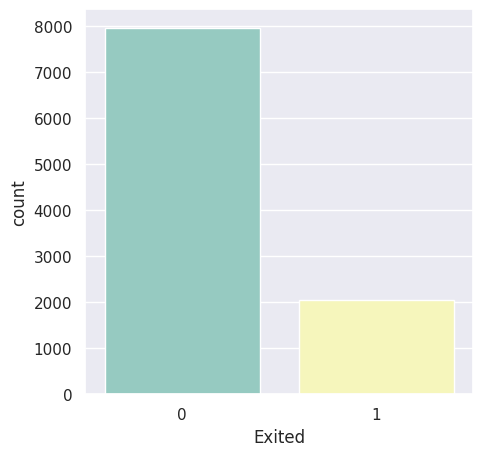

In [ ]:
#visualisasi data
plt.figure(figsize=[5,5])
sns.set(style='darkgrid')
ax = sns.countplot(x='Exited', data=data, palette='Set3')
data.loc[:,'Exited'].value_counts()

In [ ]:
y = data.Exited.values
x_data = data.drop(['Exited'], axis=1)

In [ ]:
x_data.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


In [ ]:
#normalisasi
x = (x_data - np.min(x_data)) / (np.max(x_data)-np.min(x_data))
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.002467,0.0,0.000167,0.000008,0.000000,0.000004,0.000004,0.000004,0.403944
1,0.002423,0.0,0.000163,0.000004,0.334031,0.000004,0.000000,0.000004,0.448559
2,0.002001,0.0,0.000167,0.000032,0.636357,0.000012,0.000004,0.000000,0.454095
3,0.002786,0.0,0.000155,0.000004,0.000000,0.000008,0.000000,0.000000,0.373963
4,0.003388,0.0,0.000171,0.000008,0.500246,0.000004,0.000004,0.000004,0.315204


In [ ]:
#membuat data testing dan training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=7)
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (9000, 9)
y_train shape:  (9000,)
x_test shape:  (1000, 9)
y_test shape:  (1000,)


In [ ]:
#regresi logistik
from sklearn.linear_model import LogisticRegression

# membuat model
lr = LogisticRegression()

# Training model
lr.fit(x_train, y_train)

# Predict target value dengan data testing:
y_pred0 = lr.predict(x_test)

#indexing score
score_lr = lr.score(x_test, y_test)

In [ ]:
#membuat confussion matrik
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
accuracy = accuracy_score(y_test, y_pred0)
precision = precision_score(y_test, y_pred0)
recall = recall_score(y_test, y_pred0)
f1 = f1_score(y_test, y_pred0)
print("Performance:")
print(" >accuracy = " + str(accuracy))
print(" >precision = " + str(precision))
print(" >recall = " + str(recall))
print(" >f1 = " + str(f1))

Performance:
 >accuracy = 0.799
 >precision = 0.0
 >recall = 0.0
 >f1 = 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


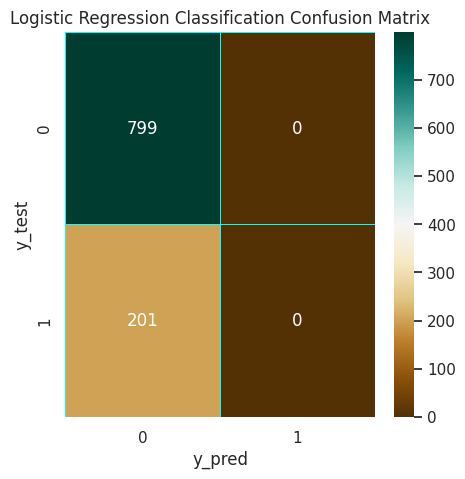

In [ ]:
# visualiasi confussion matriks
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, y_pred0)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lr_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [ ]:
#SVM
from sklearn.svm import SVC

# membuat model
svm = SVC(random_state=2)

# Training model:
svm.fit(x_train, y_train)

# Predict target values dengan data testing:
y_pred2 = svm.predict(x_test)

#indexing score
score_svm = svm.score(x_test, y_test)

In [ ]:
#membuat confussion matrik
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
print("Performance:")
print(" >accuracy = " + str(accuracy))
print(" >precision = " + str(precision))
print(" >recall = " + str(recall))
print(" >f1 = " + str(f1))

Performance:
 >accuracy = 0.799
 >precision = 0.0
 >recall = 0.0
 >f1 = 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


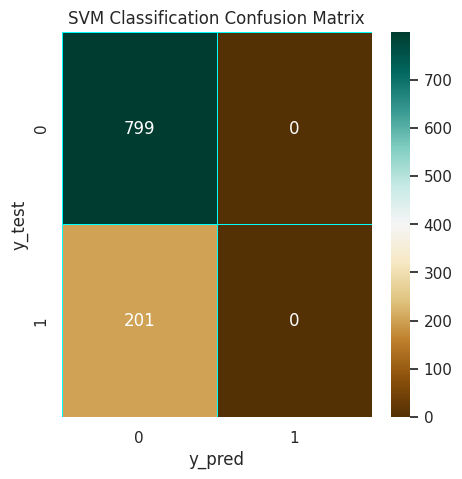

In [ ]:
# Visualisasi confussion matrik
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(y_test, y_pred2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svm_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()